In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

KNN is non-parametric, instance-based and used in a supervised learning setting

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Extracting the variables
X = data.iloc[:,[2,3]].values
Y = data.iloc[:,4].values

In [5]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [6]:
# scaling the independent data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Step 2 - fitting**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1, metric= 'minkowski',p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
# Predicting the model with X_test values
y_pred = classifier.predict(X_test)

In [9]:
# Evaluating the model with confusion matrix
from sklearn.metrics import confusion_matrix
# here confusion_matrix is a function
cm = confusion_matrix(Y_test,y_pred)
cm

array([[61,  7],
       [ 6, 26]], dtype=int64)

In [10]:
tp = cm[0][0]
fp = cm[0][1]
tn = cm[1][1]
fn = cm[1][0]
total = sum(sum(cm))
accuracy = (tp+tn)/total*100
accuracy

87.0

**Visualization**

In [11]:
fig = plt.figure(figsize=(10,5))
data0 = data[data['Purchased']==0][['Age','EstimatedSalary']]
data1 = data[data['Purchased']==1][['Age','EstimatedSalary']]
# features of people who didnot buy 
Y0 = sc.transform(np.array(data0).reshape(-1,2))
Y1 = sc.transform(np.array(data1).reshape(-1,2))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<Figure size 720x360 with 0 Axes>

Text(0.5,1,'Classification using K-NN algorithm')

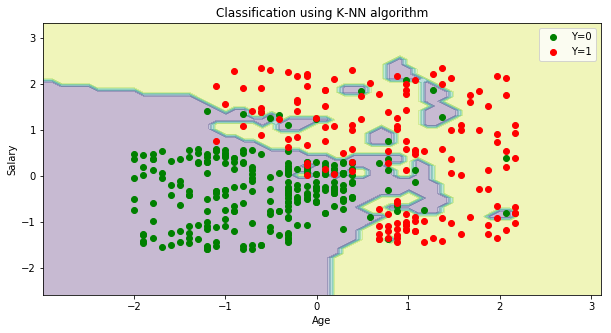

In [12]:
a

This how our **Non Linear** classification model looks like using KNN algoritm.

The model with lesser K value will show **high variance (overfitting)** and higher K value shows **biased (underfitting)** model.

**More on K-Nearest Neighbourhood algoritm**

https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/